In [1]:
!pip install python-terrier
import math
import gensim
import pyterrier as pt
import re
import numpy as np
import json
import pandas as pd
import math
import nltk
from tqdm import tqdm
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import FrenchStemmer
from SPARQLWrapper import SPARQLWrapper, JSON
import warnings
warnings.filterwarnings("ignore")
import wikipedia
import gensim.downloader as api
import random
from pyrdf2vec.graphs import KG
from pyrdf2vec import RDF2VecTransformer
from pyrdf2vec.samplers import UniformSampler
from pyrdf2vec.embedders import Word2Vec
from pyrdf2vec.walkers import RandomWalker
from utils import *

if not pt.started():
    pt.init(boot_packages=["com.github.terrierteam:terrier-prf:-SNAPSHOT"])

PyTerrier 0.9.2 has loaded Terrier 5.7 (built by craigm on 2022-11-10 18:30) and terrier-helper 0.0.7

No etc/terrier.properties, using terrier.default.properties for bootstrap configuration.


## Chargement des tables et des requetes

In [2]:
with open('tables_1000.json', 'r') as f:
  # Charger les données JSON dans un dictionnaire Python
  tables = json.load(f)
    
# Ouvrir le fichier en mode lecture
with open('requetes_20.json', 'r') as f:
  # Charger les données JSON dans un dictionnaire Python
  queries = json.load(f)

In [ ]:
all_entities = [
    "United States",
    "Germany",
    "France",
    "United Kingdom",
    "Italy",
    "Spain",
    "China",
    "Japan",
    "India",
    "Canada",
    "Australia",
    "Brazil",
    "Russia",
    "Mexico",
    "Argentina",
    "Egypt",
    "Greece",
    "Turkey",
    "South Africa",
    "Nigeria",
    "Kenya",
    "Brazil national football team",
    "Real Madrid",
    "Barcelona",
    "Manchester United",
    "Bayern Munich",
    "Lionel Messi",
    "Cristiano Ronaldo",
    "Michael Jordan",
    "LeBron James",
    "Serena Williams",
    "Roger Federer",
    "Usain Bolt",
    "Albert Einstein",
    "Isaac Newton",
    "Charles Darwin",
    "Marie Curie",
    "Galileo Galilei",
    "Leonardo da Vinci",
    "William Shakespeare",
    "Ludwig van Beethoven",
    "Wolfgang Amadeus Mozart",
    "Pablo Picasso",
    "Vincent van Gogh",
    "Mona Lisa",
    "The Starry Night",
    "Guernica",
    "The Great Gatsby",
    "To Kill a Mockingbird",
    "Romeo and Juliet",
    "Pride and Prejudice",
    "The Lord of the Rings",
    "Harry Potter",
    "The Hunger Games",
    "Game of Thrones",
    "The Walking Dead",
    "Breaking Bad",
    "Friends",
    "The Simpsons",
    "YouTube",
    "Facebook",
    "Twitter",
    "Instagram",
    "Snapchat",
    "Netflix",
    "Spotify",
    "Amazon",
    "Google",
    "Apple Inc.",
    "Microsoft",
    "Samsung",
    "iPhone",
    "Tesla",
    "Volkswagen",
    "McDonald's",
    "Coca-Cola",
    "Nike",
    "Adidas",
    "BMW",
    "Mercedes-Benz",
    "Ferrari",
    "Lamborghini",
    "Statue of Liberty",
    "Eiffel Tower",
    "Great Wall of China",
    "Taj Mahal",
    "Pyramids of Giza",
    "Mount Everest",
    "Grand Canyon",
    "Great Barrier Reef",
    "Niagara Falls",
    "Machu Picchu",
    "Stonehenge",
    "Space Shuttle",
    "International Space Station",
    "Hubble Space Telescope",
    "Mars",
    "Moon",
    "Sun",
    "DNA",
    "Human genome",
    "Artificial intelligence",
    "Machine learning",
    "Robotics",
    "Virtual reality",
    "Blockchain",
    "Climate change",
    "Renewable energy",
    "Global warming",
    "Environmental pollution",
    "World War II",
    "Cold War",
    "American Revolution",
    "French Revolution",
    "Renaissance",
    "Industrial Revolution",
    "Ancient Egypt",
    "Ancient Rome",
    "Medieval period",
    "Viking Age",
    "World Cup",
    "Olympic Games",
    "Super Bowl",
    "Formula 1",
    "Wimbledon",
    "Tour de France",
    "The Beatles",
    "Elvis Presley",
    "Michael Jackson",
    "Madonna",
    "Bob Marley",
    "Queen",
    "Rolling Stones",
    "Led Zeppelin",
    "Beethoven's Symphony No. 9",
    "Mozart's Symphony No. 40",
    "The Nutcracker",
    "Swan Lake",
    "Hamlet",
    "Macbeth",
    "Othello",
    "King Lear",
    "The Odyssey",
    "Iliad",
    "Divine Comedy",
    "Don Quixote",
    "One Hundred Years of Solitude",
    "War and Peace",
    "The Godfather",
    "The Shawshank Redemption",
    "The Dark Knight",
    "Pulp Fiction",
    "The Matrix",
    "Star Wars",
    "Harry Potter",
    "Lord of the Rings",
    "Gone with the Wind",
    "Citizen Kane",
    "Mona Lisa",
    "The Last Supper",
    "The Scream",
    "American Gothic",
    "Guernica",
    "Mona Lisa",
    "The Starry Night",
    "Guernica",
    "The Great Gatsby",
    "To Kill a Mockingbird",
    "Romeo and Juliet",
    "Pride and Prejudice",
    "The Lord of the Rings",
    "Harry Potter",
    "The Hunger Games",
    "Game of Thrones",
    "The Walking Dead",
    "Breaking Bad",
    "Friends",
    "The Simpsons",
    "YouTube",
    "Facebook",
    "Twitter",
    "Instagram",
    "Snapchat",
    "Netflix",
    "Spotify",
    "Amazon",
    "Google",
    "Apple Inc.",
    "Microsoft",
    "Samsung",
    "iPhone",
    "Tesla",
    "Volkswagen",
    "McDonald's",
    "Coca-Cola",
    "Nike",
    "Adidas",
    "BMW",
    "Mercedes-Benz",
    "Ferrari",
    "Lamborghini",
    "Statue of Liberty",
    "Eiffel Tower",
    "Great Wall of China",
    "Taj Mahal",
    "Pyramids of Giza",
    "Mount Everest",
    "Grand Canyon",
    "Great Barrier Reef",
    "Niagara Falls",
    "Machu Picchu",
    "Stonehenge",
    "Space Shuttle",
    "International Space Station",
    "Hubble Space Telescope",
    "Mars",
    "Moon",
    "Sun",
    "DNA",
    "Human genome",
    "Artificial intelligence",
    "Machine learning",
    "Robotics",
    "Virtual reality",
    "Blockchain",
    "Climate change",
    "Renewable energy",
    "Global warming",
    "Environmental pollution",
    "World War II",
    "Cold War",
    "American Revolution",
    "French Revolution",
    "Renaissance",
    "Industrial Revolution",
    "Ancient Egypt",
    "Ancient Rome",
    "Medieval period",
    "Viking Age",
    "World Cup",
    "Olympic Games",
    "Super Bowl",
    "Formula 1",
    "Wimbledon",
    "Tour de France",
    "The Beatles",
    "Elvis Presley",
    "Michael Jackson",
    "Madonna",
    "Bob Marley",
    "Queen",
    "Rolling Stones",
    "Led Zeppelin",
    "Beethoven's Symphony No. 9",
    "Mozart's Symphony No. 40",
    "The Nutcracker",
    "Swan Lake",
    "Hamlet",
    "Macbeth",
    "Othello",
    "King Lear",
    "The Odyssey",
    "Iliad",
    "Divine Comedy",
    "Don Quixote",
    "One Hundred Years of Solitude",
    "War and Peace",
    "The Godfather",
    "The Shawshank Redemption",
    "The Dark Knight",
    "Pulp Fiction",
    "The Matrix",
    "Star Wars",
    "Harry Potter",
    "Lord of the Rings",
    "Gone with the Wind",
    "Citizen Kane",
    "Mona Lisa",
    "The Last Supper",
    "The Scream",
    "American Gothic",
    "Guernica",
    "Mona Lisa",
    "The Starry Night",
    "Guernica",
    "The Great Gatsby",
    "To Kill a Mockingbird",
    "Romeo and Juliet",
    "Pride and Prejudice",
    "The Lord of the Rings",
    "Harry Potter",
    "The Hunger Games",
    "Game of Thrones",
    "The Walking Dead",
    "Breaking Bad",
    "Friends",
    "The Simpsons",
    "YouTube",
    "Facebook",
    "Twitter",
    "Instagram",
    "Snapchat",
    "Netflix",
    "Spotify",
    "Amazon",
    "Google",
    "Apple Inc.",
    "Microsoft",
    "Samsung",
    "iPhone",
    "Tesla",
    "Volkswagen",
    "McDonald's",
    "Coca-Cola",
    "Nike",
    "Adidas",
    "BMW",
    "Mercedes-Benz",
    "Ferrari",
    "Lamborghini",
    "Statue of Liberty",
    "Eiffel Tower",
    "Great Wall of China",
    "Taj Mahal",
    "Pyramids of Giza",
    "Mount Everest",
    "Grand Canyon",
    "Great Barrier Reef",
    "Niagara Falls",
    "Machu Picchu",
    "Stonehenge",
    "Space Shuttle",
    "International Space Station",
    "Hubble Space Telescope",
    "Mars",
    "Moon",
    "Sun",
    "DNA",
    "Human genome",
    "Artificial intelligence",
    "Machine learning",
    "Robotics",
    "Virtual reality",
    "Blockchain",
    "Climate change",
    "Renewable energy",
    "Global warming",
    "Environmental pollution",
    "World War II",
    "Cold War",
    "American Revolution",
    "French Revolution",
    "Renaissance",
    "Industrial Revolution",
    "Ancient Egypt",
    "Ancient Rome",
    "Medieval period",
    "Viking Age",
    "World Cup",
    "Olympic Games",
    "Super Bowl",
    "Formula 1",
    "Wimbledon",
    "Tour de France",
    "The Beatles",
    "Elvis Presley",
    "Michael Jackson",
    "Madonna",
    "Bob Marley",
    "Queen",
    "Rolling Stones",
    "Led Zeppelin",
    "Beethoven's Symphony No. 9",
    "Mozart's Symphony No. 40",
    "The Nutcracker",
    "Swan Lake",
    "Hamlet",
    "Macbeth",
    "Othello",
    "King Lear",
    "The Odyssey",
    "Iliad",
    "Divine Comedy",
    "Don Quixote",
    "One Hundred Years of Solitude",
    "War and Peace",
    "The Godfather",
    "The Shawshank Redemption",
    "The Dark Knight",
    "Pulp Fiction",
    "The Matrix",
    "Star Wars",
    "Harry Potter",
    "Lord of the Rings",
    "Gone with the Wind",
    "Citizen Kane",
    "Mona Lisa",
    "The Last Supper",
    "The Scream",
    "American Gothic",
    "Guernica",
    "Mona Lisa",
    "The Starry Night",
    "Guernica",
    "The Great Gatsby",
    "To Kill a Mockingbird",
    "Romeo and Juliet",
    "Pride and Prejudice",
    "The Lord of the Rings",
    "Harry Potter",
    "The Hunger Games",
    "Game of Thrones",
    "The Walking Dead",
    "Breaking Bad",
    "Friends",
    "The Simpsons",
    "YouTube",
    "Facebook",
    "Twitter",
    "Instagram",
    "Snapchat",
    "Netflix",
    "Spotify",
    "Amazon",
    "Google",
    "Apple Inc.",
    "Microsoft",
    "Samsung",
    "iPhone",
    "Tesla",
    "Volkswagen",
    "McDonald's",
    "Coca-Cola",
    "Nike",
    "Adidas",
    "BMW",
    "Mercedes-Benz",
    "Ferrari",
    "Lamborghini",
    "Statue of Liberty",
    "Eiffel Tower",
    "Great Wall of China",
    "Taj Mahal",
    "Pyramids of Giza",
    "Mount Everest",
    "Grand Canyon",
    "Great Barrier Reef",
    "Niagara Falls",
    "Machu Picchu",
    "Stonehenge",
    "Space Shuttle",
    "International Space Station",
    "Hubble Space Telescope",
    "Mars",
    "Moon",
    "Sun",
    "DNA",
    "Human genome",
    "Artificial intelligence",
    "Machine learning",
    "Robotics",
    "Virtual reality",
    "Blockchain",
    "Climate change",
    "Renewable energy",
    "Global warming",
    "Environmental pollution",
    "World War II",
    "Cold War",
    "American Revolution",
    "French Revolution",
    "Renaissance",
    "Industrial Revolution",
    "Ancient Egypt",
    "Ancient Rome",
    "Medieval period",
    "Viking Age",
    "World Cup",
    "Olympic Games",
    "Super Bowl",
    "Formula 1",
    "Wimbledon",
    "Tour de France",
    "The Beatles",
    "Elvis Presley",
    "Michael Jackson",
    "Madonna",
    "Bob Marley",
    "Queen",
    "Rolling Stones",
    "Led Zeppelin",
    "Beethoven's Symphony No. 9",
    "Mozart's Symphony No. 40",
    "The Nutcracker",
    "Swan Lake",
    "Hamlet",
    "Macbeth",
    "Othello",
    "King Lear",
    "The Odyssey",
    "Iliad",
    "Divine Comedy",
    "Don Quixote",
    "One Hundred Years of Solitude",
    "War and Peace",
    "The Godfather",
    "The Shawshank Redemption",
    "The Dark Knight",
    "Pulp Fiction",
    "The Matrix",
    "Star Wars",
    "Harry Potter",
    "Lord of the Rings",
    "Gone with the Wind",
    "Citizen Kane",
    "Mona Lisa",
    "The Last Supper",
    "The Scream",
    "American Gothic",
    "Guernica",
    "Mona Lisa",
    "The Starry Night",
    "Guernica",
    "The Great Gatsby",
    "To Kill a Mockingbird",
    "Romeo and Juliet",
    "Pride and Prejudice",
    "The Lord of the Rings",
    "Harry Potter",
    "The Hunger Games",
    "Game of Thrones",
    "The Walking Dead",
    "Breaking Bad",
    "Friends",
    "The Simpsons",
    "YouTube",
    "Facebook",
    "Twitter",
    "Instagram",
    "Snapchat",
    "Netflix",
    "Spotify",
    "Amazon",
    "Google",
    "Apple Inc.",
    "Microsoft",
    "Samsung",
    "iPhone",
    "Tesla",
    "Volkswagen",
    "McDonald's",
    "Coca-Cola",
    "Nike",
    "Adidas",
    "BMW",
    "Mercedes-Benz",
    "Ferrari",
    "Lamborghini",
    "Statue of Liberty",
    "Eiffel Tower",
    "Great Wall of China",
    "Taj Mahal",
    "Pyramids of Giza",
    "Mount Everest",
    "Grand Canyon",
    "Great Barrier Reef",
    "Niagara Falls",
    "Machu Picchu",
    "Stonehenge",
    "Space Shuttle",
    "International Space Station",
    "Hubble Space Telescope",
    "Mars",
    "Moon",
    "Sun",
    "DNA",
    "Human genome",
    "Artificial intelligence",
    "Machine learning",
    "Robotics",
    "Virtual reality",
    "Blockchain",
    "Climate change",
    "Renewable energy",
    "Global warming",
    "Environmental pollution",
    "World War II",
    "Cold War",
    "American Revolution",
    "French Revolution",
    "Renaissance",
    "Industrial Revolution",
    "Ancient Egypt",
    "Ancient Rome",
    "Medieval period",
    "Viking Age",
    "World Cup",
    "Olympic Games",
    "Super Bowl",
    "Formula 1",
    "Wimbledon",
    "Tour de France"]
   
all_entities = [enti.replace(' ','_') for enti in all_entities]    

all_entities = set(all_entities)

## Experimentations

In [4]:
corpus = tables['tables']
nb_tables = 1000
nb_queries = 20

In [5]:
vocabulaire = []
for i in range(nb_tables):
    table = corpus[i]
    content_word = content_extraction(table,base='word')
    vocabulaire.extend(content_word)
    
vocabulaire = set(vocabulaire)

### Unsupervised Ranking

In [8]:
scores_unsu_ran_sin = []
scores_unsu_ran_mul = []

for i,table in enumerate(corpus):
    print(f"\nPour la table {i} ")
    q = queries[i]
    print("Score BM25 en utilisant le ranking non supervisé en single field : ",unsuprvised_ranking(table,q))
    scores_unsu_ran_sin.append(unsuprvised_ranking(table,q))
    print("Score BM25 en utilisant le ranking non supervisé en multi field (poids uniforms): ",unsuprvised_ranking(table,q,False))
    scores_unsu_ran_mul.append(unsuprvised_ranking(table,q,False))
    print("Score BM25 en utilisant le ranking non supervisé en multi field (poids non uniforms): ",unsuprvised_ranking(table,q,False,[0.1,0.1,0.1,0.1,0.6]))


Pour la table 0 
Score BM25 en utilisant le ranking non supervisé en single field :  4.048603596353855
Score BM25 en utilisant le ranking non supervisé en multi field (poids uniforms):  0.0
Score BM25 en utilisant le ranking non supervisé en multi field (poids non uniforms):  0.0

Pour la table 1 
Score BM25 en utilisant le ranking non supervisé en single field :  4.394449154672439
Score BM25 en utilisant le ranking non supervisé en multi field (poids uniforms):  0.3389191441548815
Score BM25 en utilisant le ranking non supervisé en multi field (poids non uniforms):  0.16945957207744075

Pour la table 2 
Score BM25 en utilisant le ranking non supervisé en single field :  0
Score BM25 en utilisant le ranking non supervisé en multi field (poids uniforms):  0.3218875824868201
Score BM25 en utilisant le ranking non supervisé en multi field (poids non uniforms):  0.16094379124341004

Pour la table 3 
Score BM25 en utilisant le ranking non supervisé en single field :  0
Score BM25 en utilis

In [9]:
ndcg_unsu_rank_sin = []
indices_best_tables = np.argsort(scores_unsu_ran_sin)[::-1]
print("\nSCORE UNSUPERVISED RANKING")
K = [5,6,7,8]
for k in K:
    corpus = np.array(corpus)
    corpus_best = corpus[indices_best_tables]

    relevances = get_relevance(corpus_best)[:k]

    ranking = np.arange(len(relevances))
    score_ndcg = ndcg(ranking,relevances,k)
    ndcg_unsu_rank_sin.append(score_ndcg)
    print(f"NDCG@{k} = ", score_ndcg)
    
    
    
ndcg_unsu_rank_mul = []
indices_best_tables = np.argsort(scores_unsu_ran_mul)[::-1]
print("\nSCORE UNSUPERVISED RANKING")
K = [5,6,7,8]
for k in K:
    corpus = np.array(corpus)
    corpus_best = corpus[indices_best_tables]

    relevances = get_relevance(corpus_best)[:k]

    ranking = np.arange(len(relevances))
    score_ndcg = ndcg(ranking,relevances,k)
    ndcg_unsu_rank_mul.append(score_ndcg)
    print(f"NDCG@{k} = ", score_ndcg)


SCORE UNSUPERVISED RANKING
NDCG@5 =  0.6750997756088837
NDCG@6 =  0.685105528147796
NDCG@7 =  0.6939262059943844
NDCG@8 =  0.7018306653054552

SCORE UNSUPERVISED RANKING
NDCG@5 =  0.6176324474063534
NDCG@6 =  0.6305224050669415
NDCG@7 =  0.6418215600978554
NDCG@8 =  0.651896411005132


## Content Extraction

### Entity Based

In [10]:
tables_content_EB = []
for i in range(nb_tables):
    table = tables['tables'][i]
    content_word = content_extraction(table,base='entity',query=False)
    tables_content_EB.append(content_word)

query_content_EB = []
for i in range(nb_queries):
    content_word = content_extraction(queries[i],base='entity',query=True)
    query_content_EB.append(content_word)

#### Affichage de 10 tables

In [6]:
print("EN BASE WORD")
for i in range(11):
    print(f"\nLe contenu pour la table {i} : ")
    print(tables_content_WB[i])

EN BASE WORD
Le contenu pour la table 0 : 
{'Bradley', 'external', 'Udo', 'dettmar', 'Awards', 'links', 'Gordon', 'Lattek', 'cramer'}
Le contenu pour la table 1 : 
{'katha', 'climate', 'NOAA', 'burma'}
Le contenu pour la table 2 : 
{'33', 'gone', 'november', 'charts', 'till'}
Le contenu pour la table 3 : 
{'100', 'Hot', 'Track', 'song', 'Oricon', 'mikazuki', 'Chart', 'Digital', 'Japan', 'charts', 'RIAJ', 'Weekly'}
Le contenu pour la table 4 : 
{'satellite', 'sabine', 'craters', 'crater', 'N'}
Le contenu pour la table 5 : 
{'satellite', 'E', 'lunar', 'craters', 'crater', 'secchi'}
Le contenu pour la table 6 : 
{'satellite', 'silberschlag', 'craters', 'crater', 'N'}
Le contenu pour la table 7 :
{'the', 'london', 'One', 'average', 'attendances', 'valley', 'Division'}
Le contenu pour la table 8 : 
{'london', 'Two', 'South', 'the', 'average', 'attendances', 'valley', 'Division', 'Three'}
Le contenu pour la table 9 : 
{'Premier', 'london', 'First', 'the', 'League', 'attendances', 'One', 'ave

## Semantic Representation

### Bag Of Entities

In [12]:
tables_boe = []
for i in range(nb_tables):
    table = tables['tables'][i]
    content_entity_boe = semantic_representation(tables_content_EB[i],all_entities,space='boe')
    tables_boe.append(content_entity_boe)
    
    
query_boe = []
for i in range(nb_queries):
    content_entity_boe = semantic_representation(query_content_EB[i],all_entities,space='boe')
    query_boe.append(content_entity_boe)

In [13]:
print("STRATEGY EARLY")
scores_early = []
for i in range(11):
    simi = similarity(tables_boe[i],query_boe[i],strategy='early',aggr='avg',isEmbedding=False)
    print(f"Similarity entre la table {i} et la requete {i} : " , simi)
    scores_early.append(simi)
    
    
print("\nSTRATEGY LATE-MAX")
for i in range(11):
    simi = similarity(tables_boe[i],query_boe[i],strategy='late',aggr='max',isEmbedding=False)
    print(f"Similarity entre la table {i} et la requete {i} : " , simi)
    
print("\nSTRATEGY LATE-SUM")
for i in range(11):
    simi = similarity(tables_boe[i],query_boe[i],strategy='late',aggr='sum',isEmbedding=False)
    print(f"Similarity entre la table {i} et la requete {i} : " , simi)
    
    
scores_late_average = []
print("\nSTRATEGY LATE-AVG")
for i in range(11):
    simi = similarity(tables_boe[i],query_boe[i],strategy='late',aggr='avg',isEmbedding=False)
    print(f"Similarity entre la table {i} et la requete {i} : " , simi)
    scores_late_average.append(simi)

STRATEGY EARLY
Similarity entre la table 0 et la requete 0 :  0.2797856829426733
Similarity entre la table 1 et la requete 1 :  0.6190504365880053
Similarity entre la table 2 et la requete 2 :  0.17991487990817875
Similarity entre la table 3 et la requete 3 :  -0.12822769763766426
Similarity entre la table 4 et la requete 4 :  -0.04108481263405591
Similarity entre la table 5 et la requete 5 :  -0.015094224867747108
Similarity entre la table 6 et la requete 6 :  -0.050452006059050994
Similarity entre la table 7 et la requete 7 :  -0.011303913449747507
Similarity entre la table 8 et la requete 8 :  -0.011303913449747507
Similarity entre la table 9 et la requete 9 :  -0.011303913449747507
Similarity entre la table 10 et la requete 10 :  -0.06773748853961996

STRATEGY LATE-MAX
Similarity entre la table 0 et la requete 0 :  0.9993455357861073
Similarity entre la table 1 et la requete 1 :  0.9993734655195626
Similarity entre la table 2 et la requete 2 :  0.9993072809889368
Similarity entre l

## Relevance Assessements

In [14]:
ndcg_late_average = []
indices_best_tables = np.argsort(scores_late_average)[::-1]
print("\nSCORE LATE AVERAGE")
K = [5,6,7,8]

for k in K:
    corpus = np.array(corpus)
    corpus_best = corpus[indices_best_tables]

    relevances = get_relevance(corpus_best)[:k]

    ranking = np.arange(len(relevances))
    score_ndcg = ndcg(ranking,relevances,k)
    ndcg_late_average.append(score_ndcg)
    print(f"NDCG@{k} = ", score_ndcg)

    
ndcg_early = []
        
indices_best_tables = np.argsort(scores_early)[::-1]
print("\nSCORE EARLY")
K = [5,6,7,8]


for k in K:
    corpus = np.array(corpus)
    corpus_best = corpus[indices_best_tables]

    relevances = get_relevance(corpus_best)[:k]

    ranking = np.arange(len(relevances))
    score_ndcg = ndcg(ranking,relevances,k)
    ndcg_early.append(score_ndcg)
    print(f"NDCG@{k} = ", score_ndcg)


SCORE LATE AVERAGE
NDCG@5 =  0.6750997756088837
NDCG@6 =  0.685105528147796
NDCG@7 =  0.6939262059943844
NDCG@8 =  0.7018306653054552

SCORE EARLY
NDCG@5 =  0.6750997756088837
NDCG@6 =  0.685105528147796
NDCG@7 =  0.6939262059943844
NDCG@8 =  0.7018306653054552


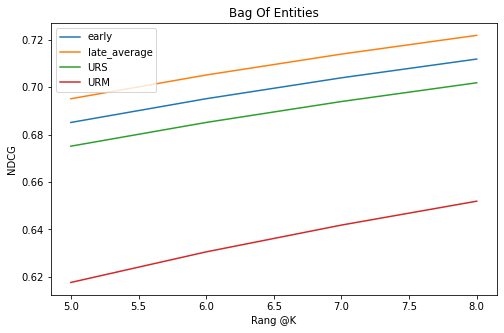

In [18]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8,5))
plt.title("Bag Of Entities")
plt.xlabel("Rang @K")
plt.ylabel("NDCG")
plt.plot(K,ndcg_early)
plt.plot(K,ndcg_late_average)
plt.plot(K,ndcg_unsu_rank_sin)
plt.plot(K,ndcg_unsu_rank_mul)
plt.legend(["early","late_average","URS","URM"],loc='upper left')
plt.show()